In [13]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

from Lineaire.Linear import *
from Lineaire.MSELoss import *
from NonLineaire.Sigmoide import Sigmoide

from icecream import ic
from src import tools

# Chargement du dataset 

In [24]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
# Données de forme (442 exemples, 10 dimensions)
# On récupère une seule dimensions (la N°3), newaxis est fait pour qu'on ait pas un vecteur mais une matrice 442*1
diabetes_X = diabetes_X[:, np.newaxis, 2]

# scaler = StandardScaler()
# diabetes_y = np.reshape(diabetes_y, (-1,1))
# dataset_diabetes = scaler.fit_transform(np.hstack((diabetes_X, diabetes_y)))

# diabetes_X=dataset_diabetes[:-1]
# diabetes_y=dataset_diabetes[-1]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = np.reshape(diabetes_y[:-20], (-1,1))
diabetes_y_test = np.reshape(diabetes_y[-20:], (-1,1))

dim_input = diabetes_X_train.shape[1] #==1, pour faire de la régression 2D
dim_output = 1  #len(diabetes_y_train.shape) == 1

## Standardisation des données

In [25]:
scaler = StandardScaler()
diabetes_X_train = scaler.fit_transform(diabetes_X_train)
scaler = StandardScaler()
diabetes_y_train = scaler.fit_transform(diabetes_y_train)
scaler = StandardScaler()
diabetes_X_test = scaler.fit_transform(diabetes_X_test)
scaler = StandardScaler()
diabetes_y_test = scaler.fit_transform(diabetes_y_test)

# Execution pas à pas

## Affichage des données et passe forward

     name  input_dim  output_dim
0  Linear          1           1
     name               parametres gradient
0  Linear  [[-7.9976526685903915]]  [[0.0]]


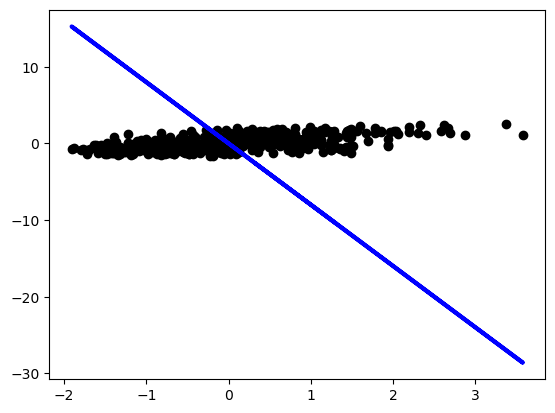

In [27]:
diabetes_y_train = np.reshape(diabetes_y_train, (-1,1))
plt.scatter(diabetes_X_train, diabetes_y_train, color="black")

couche_lineaire = Linear(dim_input, dim_output)
couche_lineaire.describe_shape()
couche_lineaire.describe_values()
output = couche_lineaire.forward(diabetes_X_train)
plt.plot(diabetes_X_train, output, color="blue", linewidth=3)

plt.xticks()
plt.yticks()
plt.show()

## Passe backward

### Cout

In [28]:
mseloss = MSELoss()
cout = mseloss.forward(diabetes_y_train, output)
print(f"{cout.mean()=}")

gradient_loss = mseloss.backward(diabetes_y_train, output) # le premier delta du backward
print(f"gradient loss p.r aux sorties: {gradient_loss}")

cout.mean()=74.22221392037295
gradient loss p.r aux sorties: [[-2.05169839e+01]
 [ 1.94923455e+01]
 [-1.44613202e+01]
 [ 2.69128870e+00]
 [ 1.28646628e+01]
 [ 1.52991384e+01]
 [ 1.64095884e+01]
 [ 3.13901145e+00]
 [-1.94538022e+01]
 [-1.70323435e+01]
 [ 2.96862910e+01]
 [-3.53747102e+00]
 [ 9.18778376e+00]
 [-2.46022897e-02]
 [ 9.68277481e+00]
 [ 5.77251444e+00]
 [-1.43850579e+01]
 [-3.67095584e+00]
 [ 5.15552412e+00]
 [ 5.85030822e+00]
 [ 2.14852241e+01]
 [ 1.03852159e+01]
 [ 3.73389902e+00]
 [-2.25922504e+01]
 [-1.26781889e+01]
 [ 3.15728568e+00]
 [ 2.65791340e+01]
 [-1.80809768e+01]
 [ 7.89658067e+00]
 [-1.11677803e+00]
 [-1.41501451e+01]
 [ 2.46167809e+01]
 [-4.68179677e+01]
 [ 1.88188985e+01]
 [ 2.37366495e+01]
 [ 1.19090347e+01]
 [-1.04313577e+01]
 [-6.73161023e+00]
 [-2.63964886e+01]
 [-2.99521167e+00]
 [ 4.35318646e+00]
 [ 2.54450498e+01]
 [ 6.08904948e+00]
 [ 9.63244369e+00]
 [-2.54911916e+01]
 [ 1.46287542e+01]
 [ 3.10618886e+00]
 [ 2.50003899e+01]
 [ 1.62318981e+01]
 [-4.343

### Mise à jour des paramètres

In [29]:
couche_lineaire.zero_grad()
couche_lineaire.backward_update_gradient(diabetes_X_train, delta=gradient_loss)
print(f'gradient: {couche_lineaire._gradient}')
#couche_lineaire.backward_delta(diabetes_X_train , delta=gradient_loss)
couche_lineaire.update_parameters(gradient_step=1e-3)
print(f'parametres: {couche_lineaire._parameters}')

gradient: [[-7238.61485574]]
parametres: [[-0.75903781]]


## Re-Passe forward

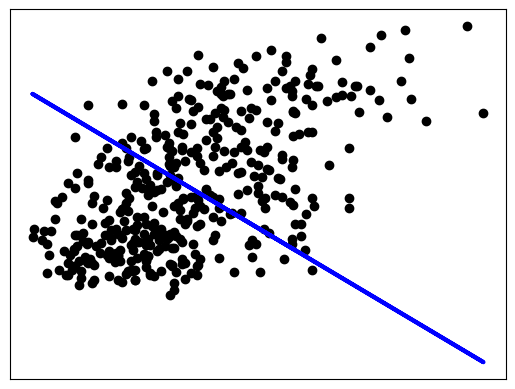

In [30]:
output2 = couche_lineaire.forward(diabetes_X_train)
plt.scatter(diabetes_X_train, diabetes_y_train, color="black")
plt.plot(diabetes_X_train, output2, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [31]:
mseloss = MSELoss()
cout = mseloss.forward(diabetes_y_train, output)
print(f"{cout.mean()=}")


cout.mean()=74.22221392037295


# Boucle d'apprentissage

In [39]:
couts = []
def train(couche_lineaire, nb_iter, eps, print_every=None):
    for i in range(nb_iter):
        output = couche_lineaire.forward(diabetes_X_train)
        
        mseloss = MSELoss()
        cout = mseloss.forward(diabetes_y_train, output)
        couts.append(cout.mean())
        if (print_every is not None) and (i % print_every == 0):
            print(cout)
            couche_lineaire.describe_values()
            print('###################')
        
        gradient_loss = mseloss.backward(diabetes_y_train, output) # le premier delta du backward
        couche_lineaire.zero_grad()
        couche_lineaire.backward_update_gradient(diabetes_X_train, delta=gradient_loss)
        couche_lineaire.update_parameters(gradient_step=eps)
    return couche_lineaire

- 1e-1 a donné une erreur
- avant j'avais pas scalé les y ce qui fait que apres quelques itérations l'apprentissage stagnait (la barre restait un peu en dessous du nuage de points)

In [40]:
couche_lineaire.reset()
couts=[]
couche_lineaire = train(couche_lineaire, nb_iter=1000, eps=1e-3, print_every=100)

[9.31542780e+01 8.52164249e+01 4.61685867e+01 1.50314244e+00
 3.68084741e+01 5.24393728e+01 5.97935484e+01 2.39023337e+00
 8.31754133e+01 6.61566692e+01 1.96217024e+02 2.55969377e+00
 1.85187541e+01 1.27941499e-03 2.10028583e+01 7.30372412e+00
 4.59410449e+01 2.95861703e+00 6.09511209e+00 7.51547791e+00
 1.03516323e+02 2.46627248e+01 3.32010378e+00 1.14489207e+02
 3.58638994e+01 2.09769545e+00 1.56707080e+02 7.14871843e+01
 1.39317324e+01 3.90112524e-01 4.40784380e+01 1.35829920e+02
 4.91589824e+02 7.93031931e+01 1.26245678e+02 3.18389472e+01
 2.49343558e+01 1.06346008e+01 1.56131254e+02 1.85184319e+00
 4.36402881e+00 1.45139299e+02 8.61769313e+00 2.09680519e+01
 1.45797187e+02 4.84378103e+01 2.05485682e+00 1.38571295e+02
 5.92468885e+01 4.14137647e+00 1.45314215e+00 1.19169247e+01
 7.79006801e+00 1.04350457e+01 1.81321766e+01 6.72923345e+01
 2.63112352e+01 1.34535591e+02 1.00901457e+02 1.52777386e+01
 3.65908925e+00 2.77617537e-01 6.45629149e+00 4.00462529e+01
 2.69596903e+01 1.466109

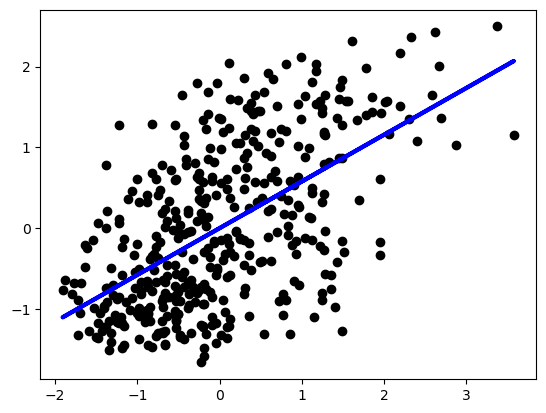

In [49]:
output2 = couche_lineaire.forward(diabetes_X_train)
plt.scatter(diabetes_X_train, diabetes_y_train, color="black")
plt.plot(diabetes_X_train, output2, color="blue", linewidth=3)

plt.xticks()
plt.yticks()
plt.show()


# Dataset de tets

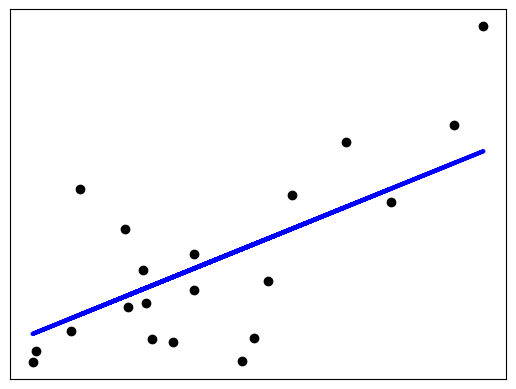

cout: [0.18481126 0.01769376 0.2337389  0.57483052 0.04679278 1.09957628
 1.96538235 0.02935315 1.98205484 0.36159102 0.02195802 0.02201711
 1.57066357 0.52584002 0.10058548 0.13826821 0.05988422 0.02500422
 0.53537122 0.04050013]
Coefficient of determination: 0.52


In [42]:
output_test = couche_lineaire.forward(diabetes_X_test)
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, output_test, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()
print(f'cout: {mseloss.forward(diabetes_y_test, output_test)}')
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, output_test))


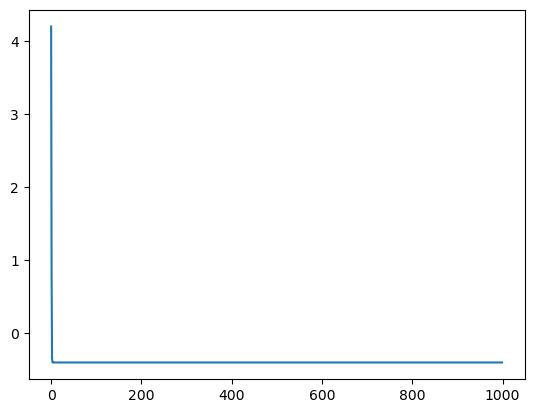

In [46]:
plt.plot( np.arange(len(couts)) , np.log(couts))

## Classification binaire

C:\Users\mouni\AppData\Local\Temp\ipykernel_14128\618804051.py:66: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


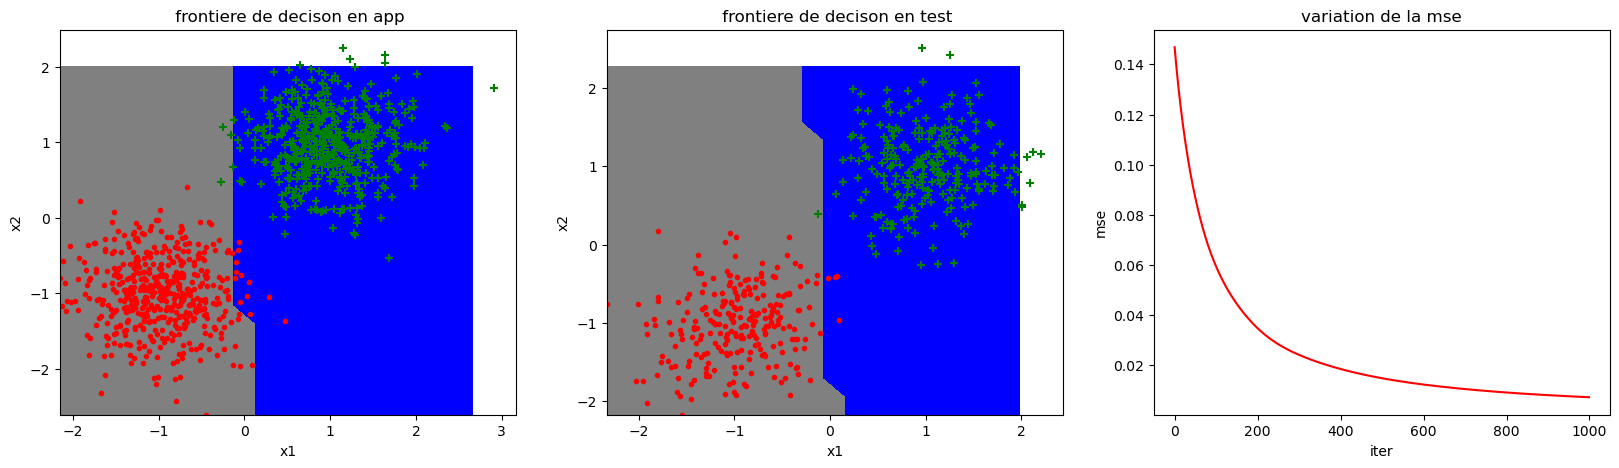

In [52]:
# # on a besoin d'un seul nourronne donc d=2, d'=1 (simple aussi) 

# batch=1000

# x_class, y_class = tools.gen_arti(sigma=0.2, nbex=batch, data_type=0, epsilon=0.1)
# x_class_t, y_class_t = tools.gen_arti(sigma=0.2, nbex=500, data_type=0, epsilon=0.1)

# y_class = np.where(y_class==-1,0,1).reshape((-1,1))
# y_class_t = np.where(y_class_t==-1,0,1).reshape((-1,1))

# loss_mse = MSELoss()
# module_lin = Linear(x_class.shape[1], 1)
# module_sig= Sigmoide()

# iter=1000
# hist_loss=[]

# for _ in range(iter):

#     #forward avoir z_h
#     new_feautre_lin_1 = module_lin.forward(x_class)
#     y_hat = module_sig.forward(new_feautre_lin_1)

    
#     hist_loss.append(loss_mse.forward(y_class,y_hat).mean())

#     #backward calculer dervie de l par rapport z_h
#     loss_back = loss_mse.backward(y_class, y_hat)
#     delta_sig = module_sig.backward_delta(new_feautre_lin_1,loss_back)
#     delta_lin1 = module_lin.backward_delta(x_class,delta_sig)

#     module_lin.backward_update_gradient(x_class, loss_back)
#     module_lin.update_parameters(gradient_step=1e-4)
    
#     module_lin.zero_grad()


# new_feautre_lin_1 = module_lin.forward(x_class)
# y_hat = module_sig.forward(new_feautre_lin_1)

# fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(20,5))
# ax.flatten()


# def sign(x):
#     return np.where(module_lin.forward(x)>0.5,1,0)


# tools.plot_frontiere(x_class,sign,ax=ax[0])
# tools.plot_data(x_class, y_class,ax[0])
# ax[0].set_xlabel("x1")
# ax[0].set_ylabel("x2")
# ax[0].set_title(" frontiere de decison en app")

# tools.plot_frontiere(x_class_t,sign,ax=ax[1])
# tools.plot_data(x_class_t, y_class_t,ax[1])
# ax[1].set_xlabel("x1")
# ax[1].set_ylabel("x2")
# ax[1].set_title(" frontiere de decison en test")


# ax[2].plot(np.arange(iter),hist_loss,color='red',label="la function de cout")
# ax[2].set_xlabel("iter")
# ax[2].set_ylabel("mse")
# ax[2].set_title("variation de la mse")
# fig.show()


C:\Users\mouni\AppData\Local\Temp\ipykernel_14128\522194279.py:66: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


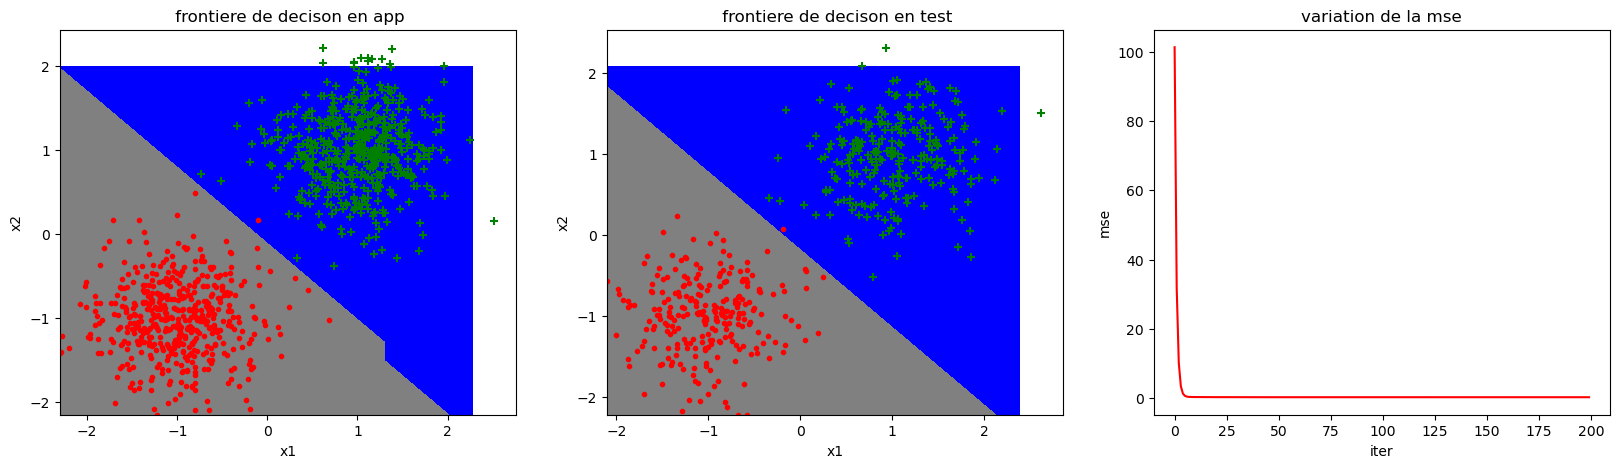

In [55]:
# on a besoin d'un seul nourronne donc d=2, d'=1 (simple aussi) 

batch=1000

x_class, y_class = tools.gen_arti(sigma=0.2, nbex=batch, data_type=0, epsilon=0.1)
x_class_t, y_class_t = tools.gen_arti(sigma=0.2, nbex=500, data_type=0, epsilon=0.1)

y_class = np.where(y_class==-1,0,1).reshape((-1,1))
y_class_t = np.where(y_class_t==-1,0,1).reshape((-1,1))

loss_mse = MSELoss()
module_lin = Linear(x_class.shape[1], 1)
#module_sig= Sigmoide()

iter=200
hist_loss=[]

for _ in range(iter):

    #forward avoir z_h
    y_hat = module_lin.forward(x_class)
    # y_hat = module_sig.forward(new_feautre_lin_1)

    
    hist_loss.append(loss_mse.forward(y_class,y_hat).mean())

    #backward calculer dervie de l par rapport z_h
    loss_back = loss_mse.backward(y_class, y_hat)
    #delta_sig = module_sig.backward_delta(new_feautre_lin_1,loss_back)
    
    delta_lin1 = module_lin.backward_delta(x_class,loss_back)
    module_lin.backward_update_gradient(x_class, loss_back)
    module_lin.update_parameters(gradient_step=1e-4)
    
    module_lin.zero_grad()


y_hat = module_lin.forward(x_class)
# y_hat = module_sig.forward(new_feautre_lin_1)

fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(20,5))
ax.flatten()


def sign(x):
    return np.where(module_lin.forward(x)>0,1,0)


tools.plot_frontiere(x_class,sign,ax=ax[0])
tools.plot_data(x_class, y_class,ax[0])
ax[0].set_xlabel("x1")
ax[0].set_ylabel("x2")
ax[0].set_title(" frontiere de decison en app")

tools.plot_frontiere(x_class_t,sign,ax=ax[1])
tools.plot_data(x_class_t, y_class_t,ax[1])
ax[1].set_xlabel("x1")
ax[1].set_ylabel("x2")
ax[1].set_title(" frontiere de decison en test")


ax[2].plot(np.arange(iter),hist_loss,color='red',label="la function de cout")
ax[2].set_xlabel("iter")
ax[2].set_ylabel("mse")
ax[2].set_title("variation de la mse")
fig.show()
